# Exercise: Working with DateTime Variables
In this task, you will work with **date and time data** in Pandas. The data set used contains counts of cyclists at various time intervals and locations in Munich. The data set contains the following variables:
- `“datum”` = date
- `“uhrzeit_start”` = start of the measurement interval
- `“uhrzeit_ende”` = end of the measurement interval
- `“richtung_1”` = direction of travel 1 of the cyclist
- `“richtung_2”` = direction of travel 2 of the cyclist
- `“total”` = total number of cyclists in a time interval

In [59]:
import pandas as pd

df = pd.read_csv('rad_15min_condensed.csv')

## Task 1
**Creating Time Variables**
- Use the columns **`datum` (date)** and **`uhrzeit_start` (start time)** to create a new column called **`datetime_start`**.
- Similarly, combine **`datum` (date)** and **`uhrzeit_ende` (end time)** into a new **`datetime_end`** column.
- Make sure that the variables is in the correct **datetime format**.
- After successfully creating `datetime_start` and `datetime_end`, **remove the original columns** (`datum`, `uhrzeit_start`, and `uhrzeit_ende`) from the dataset.

In [61]:
df["datetime_start"] = pd.to_datetime(df["datum"] + " " + df["uhrzeit_start"])
df["datetime_end"] = pd.to_datetime(df["datum"] + " " + df["uhrzeit_ende"])
print(df)

             datum uhrzeit_start uhrzeit_ende zaehlstelle  richtung_1  \
0       2022.11.01         06:15        06:30    Kreuther         0.0   
1       2022.11.01         06:15        06:30  Margareten         3.0   
2       2022.11.01         06:15        06:30     Olympia         0.0   
3       2022.11.01         06:30        06:45      Arnulf         6.0   
4       2022.11.01         06:30        06:45     Erhardt         1.0   
...            ...           ...          ...         ...         ...   
399995  2024.12.31         23:45        00:00      Arnulf         0.0   
399996  2024.12.31         23:45        00:00     Erhardt         3.0   
399997  2024.12.31         23:45        00:00      Hirsch         0.0   
399998  2024.12.31         23:45        00:00    Kreuther         0.0   
399999  2024.12.31         23:45        00:00     Olympia         5.0   

        richtung_2  gesamt      datetime_start        datetime_end  
0              0.0     0.0 2022-11-01 06:15:00 2022-11

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   datum           400000 non-null  object        
 1   uhrzeit_start   400000 non-null  object        
 2   uhrzeit_ende    400000 non-null  object        
 3   zaehlstelle     400000 non-null  object        
 4   richtung_1      399040 non-null  float64       
 5   richtung_2      399040 non-null  float64       
 6   gesamt          399040 non-null  float64       
 7   datetime_start  400000 non-null  datetime64[ns]
 8   datetime_end    400000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(4)
memory usage: 27.5+ MB


In [65]:
df = df.drop(columns=["datum", "uhrzeit_start", "uhrzeit_ende"])

## Task 2
In this task, you will analyze time-based trends in cycling data: determine **the peak hour for each counting station ("zaehlstelle")** based on the total number of cyclists recorded. Your result should be a dataframe showing:
 - The **counting station (`zaehlstelle`)**  
  - The **peak hour (`peakhour`)**  
  - The **total number of cyclists during that peak hour (`total_cyclists_peakhour`)**  



In [67]:
df["hour"] = df["datetime_start"].dt.hour
hours = df.groupby(["zaehlstelle", "hour"])["gesamt"].sum().reset_index()
hours

,zaehlstelle,hour,gesamt
0,Arnulf,0,7440.0
1,Arnulf,1,4002.0
2,Arnulf,2,2866.0
3,Arnulf,3,2302.0
4,Arnulf,4,3748.0
...,...,...,...
139,Olympia,19,123132.0
140,Olympia,20,94387.0
141,Olympia,21,64610.0
142,Olympia,22,46509.0


In [69]:
peak_hour_df = peak_hours.loc[peak_hours.groupby("zaehlstelle")["gesamt"].idxmax()]
peak_hour_df

,zaehlstelle,hour,gesamt
8,Arnulf,8,97928.0
42,Erhardt,18,314197.0
56,Hirsch,8,148568.0
79,Kreuther,7,15395.0
113,Margareten,17,160978.0
138,Olympia,18,166817.0


## Task 3
Analyze the dataset to determine whether the number of cyclists follows a **trend** or exhibits **seasonal patterns**.

1. **Trend Analysis**
Investigate if the cyclist count follows an increasing or decreasing trend.
- Compute a **7-day moving average** to smooth out short-term fluctuations.
- Plot both the **original data** and the **moving average**.

2. **Apply Differencing to Remove Trends**
- Compute the **first-order difference** of the data.
- Plot the differenced data and analyze whether the trend is removed.

3. **Compute ACF & PACF**
- **Autocorrelation Function (ACF):** Detect repeating cycles (e.g., daily or weekly patterns).
- **Partial Autocorrelation Function (PACF):** Identify significant lags that influence future values.

**Questions for Analysis**
- **Do you observe a clear trend in the cyclist count over time?**  
- **Is there a repeating pattern in the data?**  
- **What do the ACF/PACF plots suggest about seasonal effects?**  


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


df = df.dropna(subset=['gesamt'])
daily_counts = df['gesamt'].resample('D').sum()
moving_avg = daily_counts.rolling(window=7).mean()


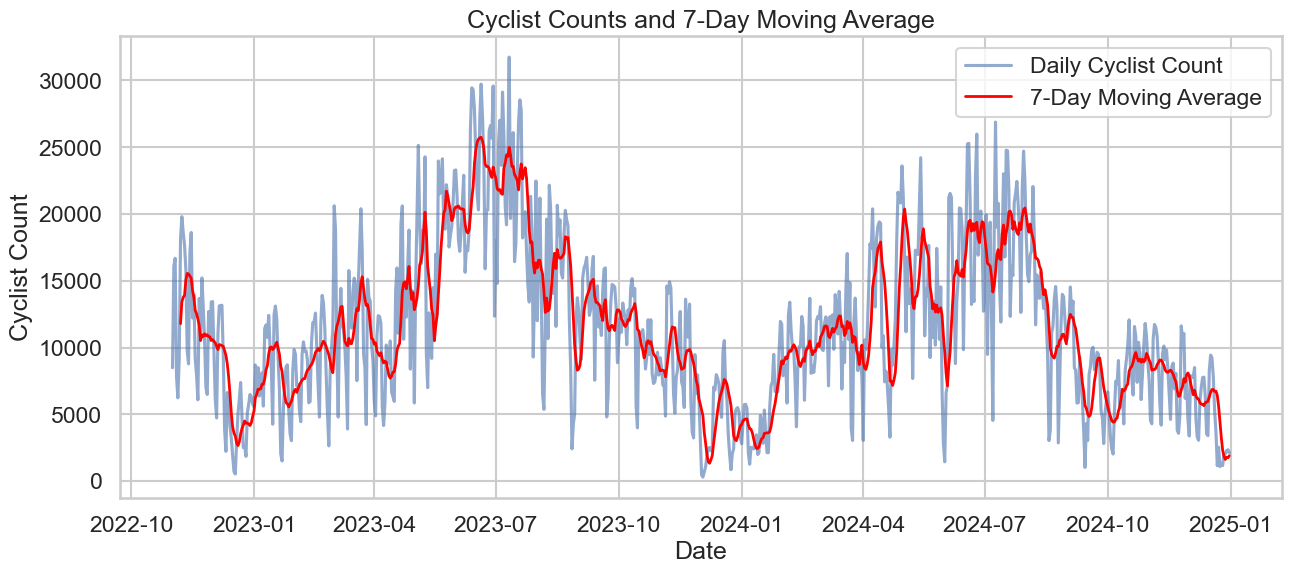

In [87]:
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(15, 6))
plt.plot(daily_counts, label='Daily Cyclist Count', alpha=0.6)
plt.plot(moving_avg, label='7-Day Moving Average', color='red', linewidth=2)
plt.title("Cyclist Counts and 7-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Cyclist Count")
plt.legend()
plt.show()

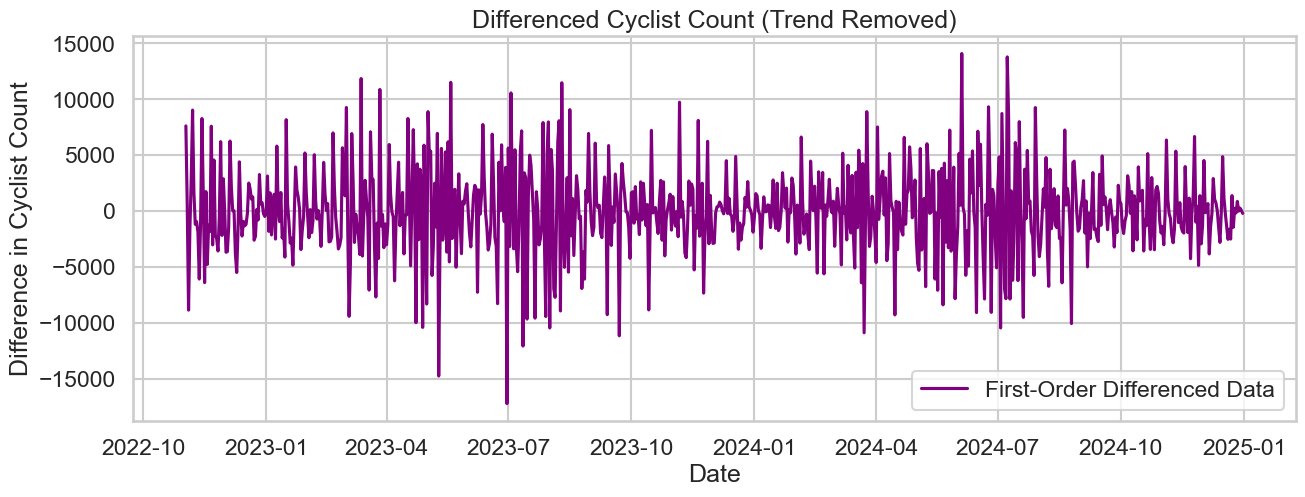

In [89]:
differenced = daily_counts.diff().dropna()

plt.figure(figsize=(15, 5))
plt.plot(differenced, label='First-Order Differenced Data', color='purple')
plt.title("Differenced Cyclist Count (Trend Removed)")
plt.xlabel("Date")
plt.ylabel("Difference in Cyclist Count")
plt.legend()
plt.show()

It can be observed that the cyclist count increases in the summer months and decreases in the winter months, which shows a seasonal trend.
After differencing we can see regular systematic fluctuations and that the peaks have consistent time intervals betwen them which further implies seasonality.
But there isn't a clear long term trend.

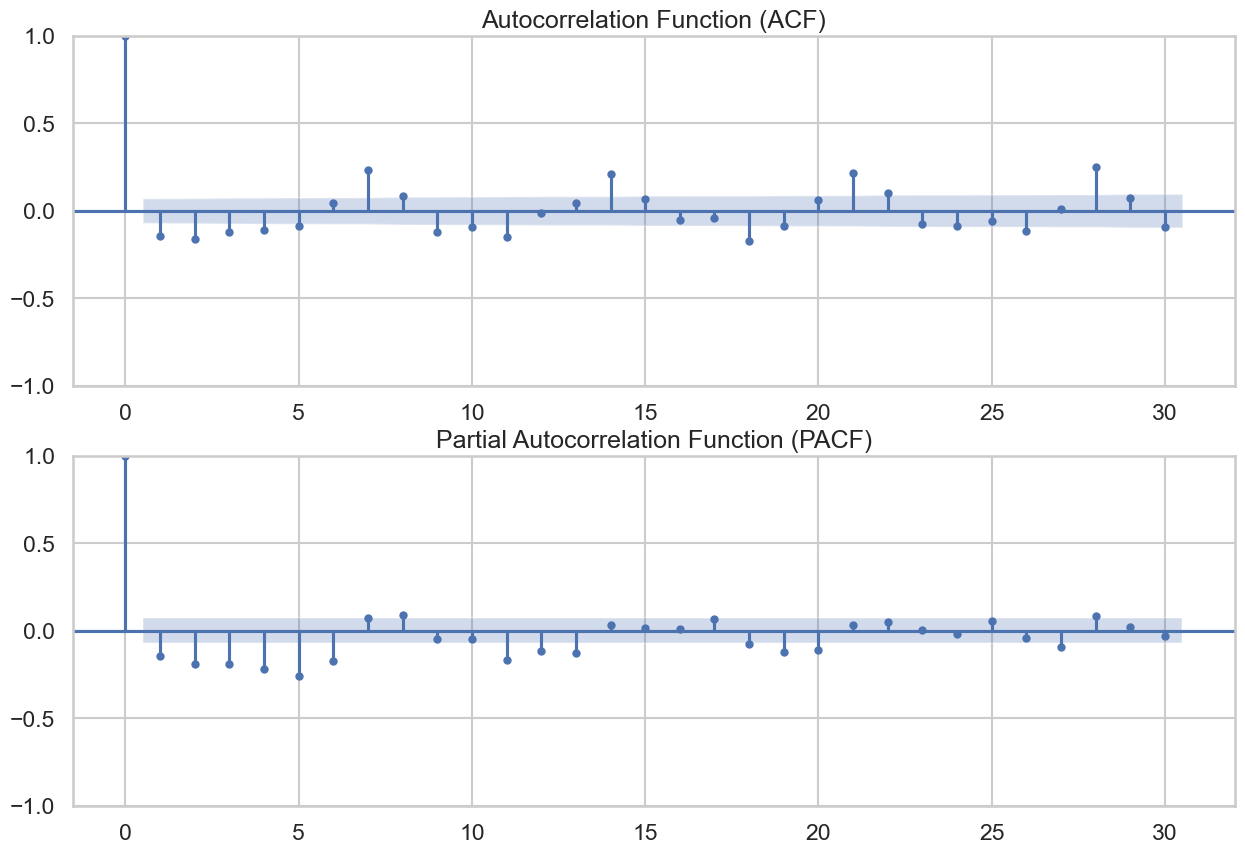

In [104]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
plot_acf(differenced, lags=30, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")
plot_pacf(differenced, lags=30, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")
plt.show()

The ACF and PACF suggest that there is little autocorrelation present in the data. 
The spikes present at 7, 14, 21, 28 likely mean that there is some autocorrelation between the same day from different weeks.